<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/transformers_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LAst amended: 25th October
# Hugging face dataset from csv file:
# Ref: https://huggingface.co/docs/datasets/v1.1.1/loading_datasets.html#from-local-files
# From pandas dataframe:
#  https://huggingface.co/docs/datasets/v1.1.1/loading_datasets.html#from-a-pandas-dataframe
# Process datasets:
# https://huggingface.co/docs/datasets/process

In [ ]:
# 1.0 Install transformers and datasets
!pip install transformers datasets

In [45]:
# 1.1 Call libraries:
from transformers import pipeline
from datasets import load_dataset
from datasets import Dataset
import numpy as np
import pandas as pd
import re


# 1.2 To display youtube videos
from IPython.display import YouTubeVideo


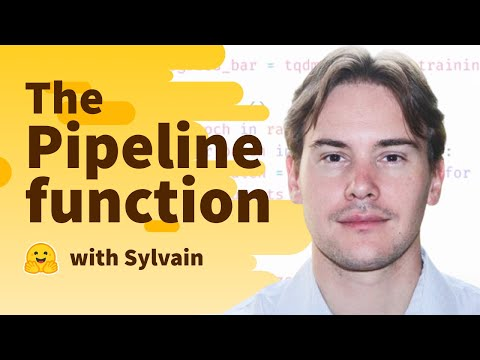

In [3]:
# 1.2 Display Transformers, Quick Start video:

YouTubeVideo('tiZFewofSLM')

## What is a pipeline?<br>


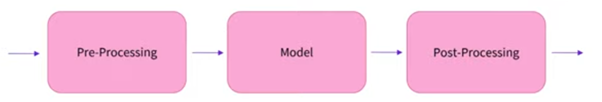

## Sentiment analysis

In [4]:
# 2.0 Instantiate 'pipeline' for sentiment-anaysis: 

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# 2.1 Discover sentiment of a sentence:
#      emoji inserted in the sentece is just an image,
#       inserted within the sentence. emoji acts just
#        like a printed letter: 
#         😎 😀 😭 🤣 😂 🙂 😇 😠 🤐 😒

classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [6]:
# 2.2 Find entiments of multiple sentences.
#     Collect all the sentences in a list:

lu = [
      "We are very happy to show you the 🤗 Transformers library.",
      "We hope you don't hate it."
      ]

# 2.3 Get results for all at once:

results = classifier(lu)


In [7]:
# 2.4 results is a list of dictionaries:

results

[{'label': 'POSITIVE', 'score': 0.9997795224189758},
 {'label': 'NEGATIVE', 'score': 0.530860960483551}]

In [8]:
# 2.5 Get results for each:
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309


In [9]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [11]:
pathToFolder = "/gdrive/MyDrive/Colab_data_files/drugs_raw/"

In [13]:
drug = "drugsComTrain_raw.tsv"

In [15]:
# Read dataset in pandas:
data = pd.read_csv(pathToFolder + drug, sep = "\t")

In [16]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [40]:
data['review'] = data['review'].str.replace('"', '')


In [41]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around....,9.0,"November 27, 2016",37


In [46]:
dataset = Dataset.from_pandas(data)

In [ ]:
dataset['review']

In [49]:
classifier(dataset['review'][:5])

[{'label': 'NEGATIVE', 'score': 0.9365567564964294},
 {'label': 'POSITIVE', 'score': 0.8964248299598694},
 {'label': 'NEGATIVE', 'score': 0.9960998296737671},
 {'label': 'NEGATIVE', 'score': 0.9308453798294067},
 {'label': 'POSITIVE', 'score': 0.9024233222007751}]

In [19]:
# \t is the tab character in Python

data_files = {"train": pathToFolder + "drugsComTrain_raw.tsv", "test": pathToFolder +"drugsComTest_raw.tsv"}



In [20]:
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

  0%|          | 0/2 [00:00<?, ?it/s]

In [21]:
drug_sample = drug_dataset["train"].shuffle(seed=42).select(range(1000))

In [22]:
drug_sample.shape  # (1000, 7)

(1000, 7)

In [23]:
drug_sample[:3]

{'Unnamed: 0': [87571, 178045, 80482],
 'drugName': ['Naproxen', 'Duloxetine', 'Mobic'],
 'condition': ['Gout, Acute', 'ibromyalgia', 'Inflammatory Conditions'],
 'review': ['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
  '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects."',
  '"I have been taking Mobic for over a year with no side effects other than 

In [24]:
drug_sample['review'][:3]

['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
 '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects."',
 '"I have been taking Mobic for over a year with no side effects other than an elevated blood pressure.  I had severe knee and ankle pain which completely went away after taking Mobic.  I attempted to stop the medication however pain returned after a 

In [26]:
classifier("I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects.")

[{'label': 'NEGATIVE', 'score': 0.9917237162590027}]

In [34]:
# Refer: https://bobbyhadz.com/blog/python-extract-string-from-between-quotes
g = [re.findall(r'"([^"]*)"', i) for i in drug_sample['review']]

In [35]:
resultList = [element for nestedlist in g for element in nestedlist]

In [ ]:
resultList

In [38]:
classifier(resultList[:5])

[{'label': 'POSITIVE', 'score': 0.9654753804206848},
 {'label': 'NEGATIVE', 'score': 0.9917237162590027},
 {'label': 'NEGATIVE', 'score': 0.9979457259178162},
 {'label': 'POSITIVE', 'score': 0.9920908212661743},
 {'label': 'POSITIVE', 'score': 0.9409458041191101}]

In [28]:
new_drug_dataset = drug_sample['review'].map(
    lambda x: x, batched=True
)

AttributeError: ignored

In [ ]:
from transformers.pipelines.pt_utils import KeyDataset
import datasets


In [ ]:
help(KeyDataset)

In [ ]:
dataset = datasets.load_dataset("imdb", name="plain_text", split="unsupervised")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


In [ ]:
dataset.column_names

['text', 'label']

In [ ]:
dataset.to_pandas()

,text,label
0,This is just a precious little diamond. The pl...,-1
1,When I say this is my favourite film of all ti...,-1
2,I saw this movie because I am a huge fan of th...,-1
3,Being that the only foreign films I usually li...,-1
4,After seeing Point of No Return (a great movie...,-1
...,...,...
49995,License To Kill (1989) is an inanely dismal in...,-1
49996,I love watching a James Bond. It's not very in...,-1
49997,I can't decide what was the worst thing about ...,-1
49998,UGH... As an adorer of the James Bond characte...,-1


In [ ]:
# https://stackoverflow.com/q/66954682
pipe = pipeline("text-classification", truncation=True)
for out in pipe(KeyDataset(dataset, "text"  ), batch_size=8):
    print(out)